In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import csv
import numpy as np

/tmp/ipykernel_10922/225903042.py:32: UserWarning: Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from font(s) DejaVu Serif.
  plt.tight_layout() # 调整布局，避免标签重叠
/tmp/ipykernel_10922/225903042.py:32: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Serif.
  plt.tight_layout() # 调整布局，避免标签重叠
/tmp/ipykernel_10922/225903042.py:32: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Serif.
  plt.tight_layout() # 调整布局，避免标签重叠
/tmp/ipykernel_10922/225903042.py:32: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Serif.
  plt.tight_layout() # 调整布局，避免标签重叠
/tmp/ipykernel_10922/225903042.py:32: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Serif.
  plt.tight_layout() # 调整布局，避免标签重叠
/tmp/ipykernel_10922/225903042.py:32: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from font(s) DejaVu Serif.
  plt.tight_layout() # 调整布局，避免标签重叠
/tmp

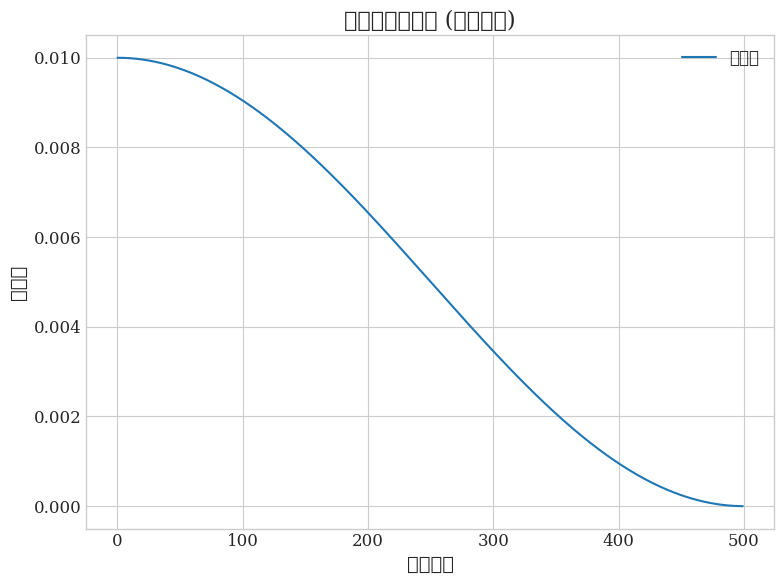

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 假设我们已经有了 learning_rates 和 total_iterations (来自上面的示例)
# 为了演示，我们重新生成一些数据
epochs = 10
init_lr = 0.01
num_iter_per_epoch = 50
total_iterations = epochs * num_iter_per_epoch
iterations = np.arange(total_iterations)
learning_rates = [init_lr * (1 + np.cos(np.pi * i / total_iterations)) / 2 for i in iterations]

# 顶会风格设置
plt.style.use('seaborn-v0_8-whitegrid') # 使用一个干净的风格
plt.rcParams['font.family'] = 'serif' # 使用衬线字体
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (8, 6) # 设置图形大小
plt.rcParams['legend.fontsize'] = 12

# 绘制学习率曲线
plt.plot(iterations, learning_rates, label='学习率')
plt.xlabel("迭代次数")
plt.ylabel("学习率")
plt.title("学习率变化曲线 (余弦退火)")
plt.legend()
plt.tight_layout() # 调整布局，避免标签重叠
plt.show()

In [18]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x

In [19]:
model = Network()

In [20]:
type(model)

__main__.Network

In [21]:
for name, param in model.named_parameters():
    print(f"{name}: {param.size()}")

conv1.weight: torch.Size([16, 3, 3, 3])
conv1.bias: torch.Size([16])
conv2.weight: torch.Size([32, 16, 3, 3])
conv2.bias: torch.Size([32])


In [22]:
def get_weight(config):
    AUs_num = config.DATA.CLASS_NUM
    aus = ['AU'+str(au_name) for au_name in config.DATA.AU_LIST]
    with open(config.DATA.SOURCE.TRAIN_LIST, 'r') as f:
        reader = csv.DictReader(f)
        labels = np.array([[int(row[au]) for au in aus] for row in reader])
        all_ = [len(labels)] * AUs_num
        positive = np.sum(labels, 0)

    negative = np.array(all_) - positive

    weight_cls = WeightNorm(positive.tolist(), negative.tolist())
    norm_weight = weight_cls.normalize()
    norm_weight =  np.array(norm_weight)
    norm_weight = norm_weight.tolist()
    norm_weight = torch.FloatTensor(norm_weight)
    return norm_weight